# K-means

In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

from bs4 import BeautifulSoup
import re
import time

from nltk.corpus import stopwords
import nltk.data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\python36\virtualenv\venv01\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\python36\virtualenv\venv01\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
model = Word2Vec.load('300features_40minwords_10text')
model

In [3]:
# 숫자로 단어를 표현
# Word2Vec 모델은 어휘의 각 단어에 대한 feature 벡터로 구성되며
# 'syn0'이라는 넘파이 배열로 저장된다.
# syn0의 행 수는 모델 어휘의 단어 수
# 컬럼 수는 2부에서 설정한 피처 벡터의 크기
type(model.wv.syn0)

c:\python36\virtualenv\venv01\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


numpy.ndarray

In [5]:
# syn0 행 수는 모델 어휘의 단어 수
# 열 수는 model에 저장된 feature 벡터의 크기
model.wv.syn0.shape

c:\python36\virtualenv\venv01\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(11986, 300)

In [6]:
# syn0 대신 vectors 를 쓰라고 경고문구가 출력된다
model.wv.vectors

array([[-0.01407099,  0.05978495,  0.10904958, ...,  0.03489097,
        -0.01498439, -0.0406926 ],
       [ 0.02395492, -0.07464198,  0.01103772, ..., -0.07766364,
        -0.04998885,  0.01728406],
       [-0.04068885,  0.04899728,  0.06531753, ...,  0.03039648,
        -0.0559355 , -0.07248874],
       ...,
       [-0.00720401, -0.13645598, -0.1414783 , ...,  0.08096032,
         0.0590723 ,  0.01041627],
       [-0.05042247, -0.07480855, -0.09169729, ...,  0.03250502,
        -0.03468992,  0.03720089],
       [-0.01912921, -0.10364831, -0.08356653, ...,  0.06598164,
         0.01646837, -0.03517806]], dtype=float32)

In [7]:
model.wv.vectors.shape

(11986, 300)

In [8]:
# 개별 단어 벡터에 접근
model.wv['flower'].shape

(300,)

In [9]:
model.wv['flower'][:10]

array([-0.10424045, -0.07194798, -0.04157041, -0.11113957,  0.00888773,
        0.07665455,  0.00175261, -0.08243841,  0.04891389, -0.07008083],
      dtype=float32)

In [10]:
# 단어 벡터에서 k-means를 실행하고 일부 클러스터를 찍어본다
start = time.time() # 시작 시간

# k를 어휘 크기의 1/5나 평균 5단어로 설정
word_vectors = model.wv.vectors # 어휘의 feature vector
num_clusters = word_vectors.shape[0] / 5
num_clusters = int(num_clusters)

# k-means를 정의하고 학습
kmeans_clustering = KMeans(n_clusters=num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors)

end = time.time() # 종료 시간
print("걸린 시간 : ", end - start, '초')

걸린 시간 :  216.43715858459473 초


In [11]:
idx[:10]

array([ 676, 1494, 1118, 1507, 1483,  304,  375, 1300, 1212,  376])

In [12]:
# 각 어휘 단어를 클러스터 번호에 매핑되게 word/index 사전을 만든다
idx = list(idx)
names = model.wv.index2word
word_centroid_map = {names[i]:idx[i] for i in range(len(names))}

# 첫 번째 클러스터의 처음 10개를 출력
for cluster in range(0,10):
    # 클러스터 번호 출력
    print('\nCluster {}'.format(cluster))
    
    # 클러스터 번호와 클러스터에 있는 단오를 찍는다.
    words = []
    for i in range(0, len(list(word_centroid_map.values()))):
        if (list(word_centroid_map.values())[i] == cluster):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['west', 'cowboy']

Cluster 1
['koch']

Cluster 2
['manner', 'overst', 'unsubtl', 'concis']

Cluster 3
['racer', 'jaguar']

Cluster 4
['punish', 'condemn', 'sacrif', 'deem']

Cluster 5
['slim', 'valiant', 'dignifi', 'persuas', 'trophi', 'distraught', 'maya', 'peg', 'toto', 'talkat', 'forthcom', 'overwork', 'virtuous', 'troublesom', 'benign', 'calvin', 'dominick', 'heartbroken', 'gutsi', 'macgregor', 'baptist']

Cluster 6
['locust']

Cluster 7
['nicol', 'kidman']

Cluster 8
['surf', 'cinemax']

Cluster 9
['push', 'broken', 'gear', 'shove', 'stream', 'ram', 'gutter']


In [16]:
word_centroid_map.items()

dict_items([('the', 676), ('and', 1494), ('a', 1118), ('of', 1507), ('to', 1483), ('is', 304), ('it', 375), ('in', 1300), ('i', 1212), ('this', 376), ('that', 376), ('s', 304), ('movi', 375), ('film', 375), ('was', 896), ('as', 1540), ('with', 1501), ('for', 1458), ('but', 198), ('you', 445), ('t', 340), ('be', 692), ('on', 632), ('have', 827), ('not', 2171), ('he', 1873), ('are', 896), ('his', 654), ('one', 375), ('all', 2185), ('at', 2306), ('they', 1568), ('like', 1277), ('by', 1595), ('who', 2029), ('an', 1070), ('from', 1361), ('so', 1649), ('there', 772), ('her', 744), ('or', 1510), ('just', 894), ('about', 853), ('out', 1185), ('has', 2270), ('if', 696), ('what', 376), ('time', 138), ('some', 1869), ('make', 1279), ('good', 626), ('can', 1030), ('charact', 1730), ('more', 664), ('when', 283), ('see', 2027), ('get', 2279), ('veri', 392), ('she', 744), ('up', 232), ('watch', 2027), ('stori', 293), ('no', 1754), ('even', 854), ('would', 813), ('my', 1303), ('which', 376), ('their',

In [17]:
'''
판다스로 데이터프레임 형태 데이터로 읽어온다.
QUOTE_MINIMAL (0), QUOTE_ALL (1), 
QUOTE_NONNUMERIC (2) or QUOTE_NONE (3).

그리고 이전 튜토리얼에서 했던 것처럼 clean_train_reviews 와 
clean_test_reviews 로 텍스트를 정제한다.
'''
train = pd.read_csv('word_tutorial/labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
test = pd.read_csv('word_tutorial/testData.tsv', header=0, delimiter='\t', quoting=3)

In [18]:
from KaggleWord2VecUtility import KaggleWord2VecUtility

# 학습 리뷰를 정제
clean_train_reviews = []
for review in train['review']:
    clean_train_reviews.append(KaggleWord2VecUtility.review_to_wordlist(review, remove_stopwords=True))
    
# 테스트 리뷰를 정제
clean_test_reviews = []
for review in test['review']:
    clean_test_reviews.append(KaggleWord2VecUtility.review_to_wordlist(review, remove_stopwords=True))

In [19]:
# bag of centroids 생성
# 속도를 위해 centroid 학습 세트 bag을 미리 할당한다.
train_centroids = np.zeros((train['review'].size, num_clusters), dtype='float32')

train_centroids[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
# centroid는 두 클러스터 중심점을 정의 후 중심점의 거리를 측정한 것

def create_bag_of_centroids(wordlist, word_centroid_map):
    
    # 클러스터 수 = word / centroid map에서 가장 높은 클러스터 인덱스와 같다.
    num_centroids = max(word_centroid_map.values()) + 1
    
    # 속도를 위해 미리 bag 할당
    bag_of_centroids = np.zeros(num_centroids, dtype='float32')
    
    # 루프 돌다 단어가 word_centroid_map에 있으면 해당 클러스터 수 1씩 증가
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
            
    return bag_of_centroids

In [21]:
# 학습 리뷰를 bags of centroids로 변환
counter = 0
for review in clean_train_reviews:
    train_centroids[counter] = create_bag_of_centroids(review, word_centroid_map)
    counter += 1

In [22]:
# 테스트 리뷰도 같은 식으로 반복

# bag of centroids 생성
# 속도를 위해 centroid 학습 세트 bag을 미리 할당한다.
test_centroids = np.zeros((test['review'].size, num_clusters), dtype='float32')

counter = 0
for review in clean_test_reviews:
    test_centroids[counter] = create_bag_of_centroids(review, word_centroid_map)
    counter += 1

In [23]:
# 랜덤 포레스트를 사용하여 학습 및 예측
forest = RandomForestClassifier(n_estimators=100)
%time forest = forest.fit(train_centroids, train['sentiment'])

Wall time: 24.3 s


In [24]:
# 교차 검증으로 score 구하기
from sklearn.model_selection import cross_val_score

%time score = np.mean(cross_val_score(forest, train_centroids, train['sentiment'], cv=10, scoring='roc_auc'))

Wall time: 3min 32s


In [25]:
score

0.911876576

In [26]:
result = forest.predict(test_centroids)

In [27]:
output = pd.DataFrame({'id':test['id'], 'sentiment':result})

In [29]:
output.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",0
4,"""12128_7""",1


In [30]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

590


0    12795
1    12205
Name: sentiment, dtype: int64

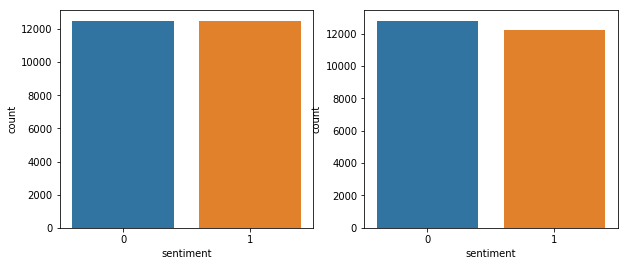

In [31]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10, 4)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])